# ADS - Network analysis module, homework 1

In [1]:
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## Task 1. Analysis of Les Miserables network 

In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/lesmis.gml
G = nx.read_gml('lesmis.gml') 

### Q1. Visualize the network below with node labes and sizes proportional to node degree

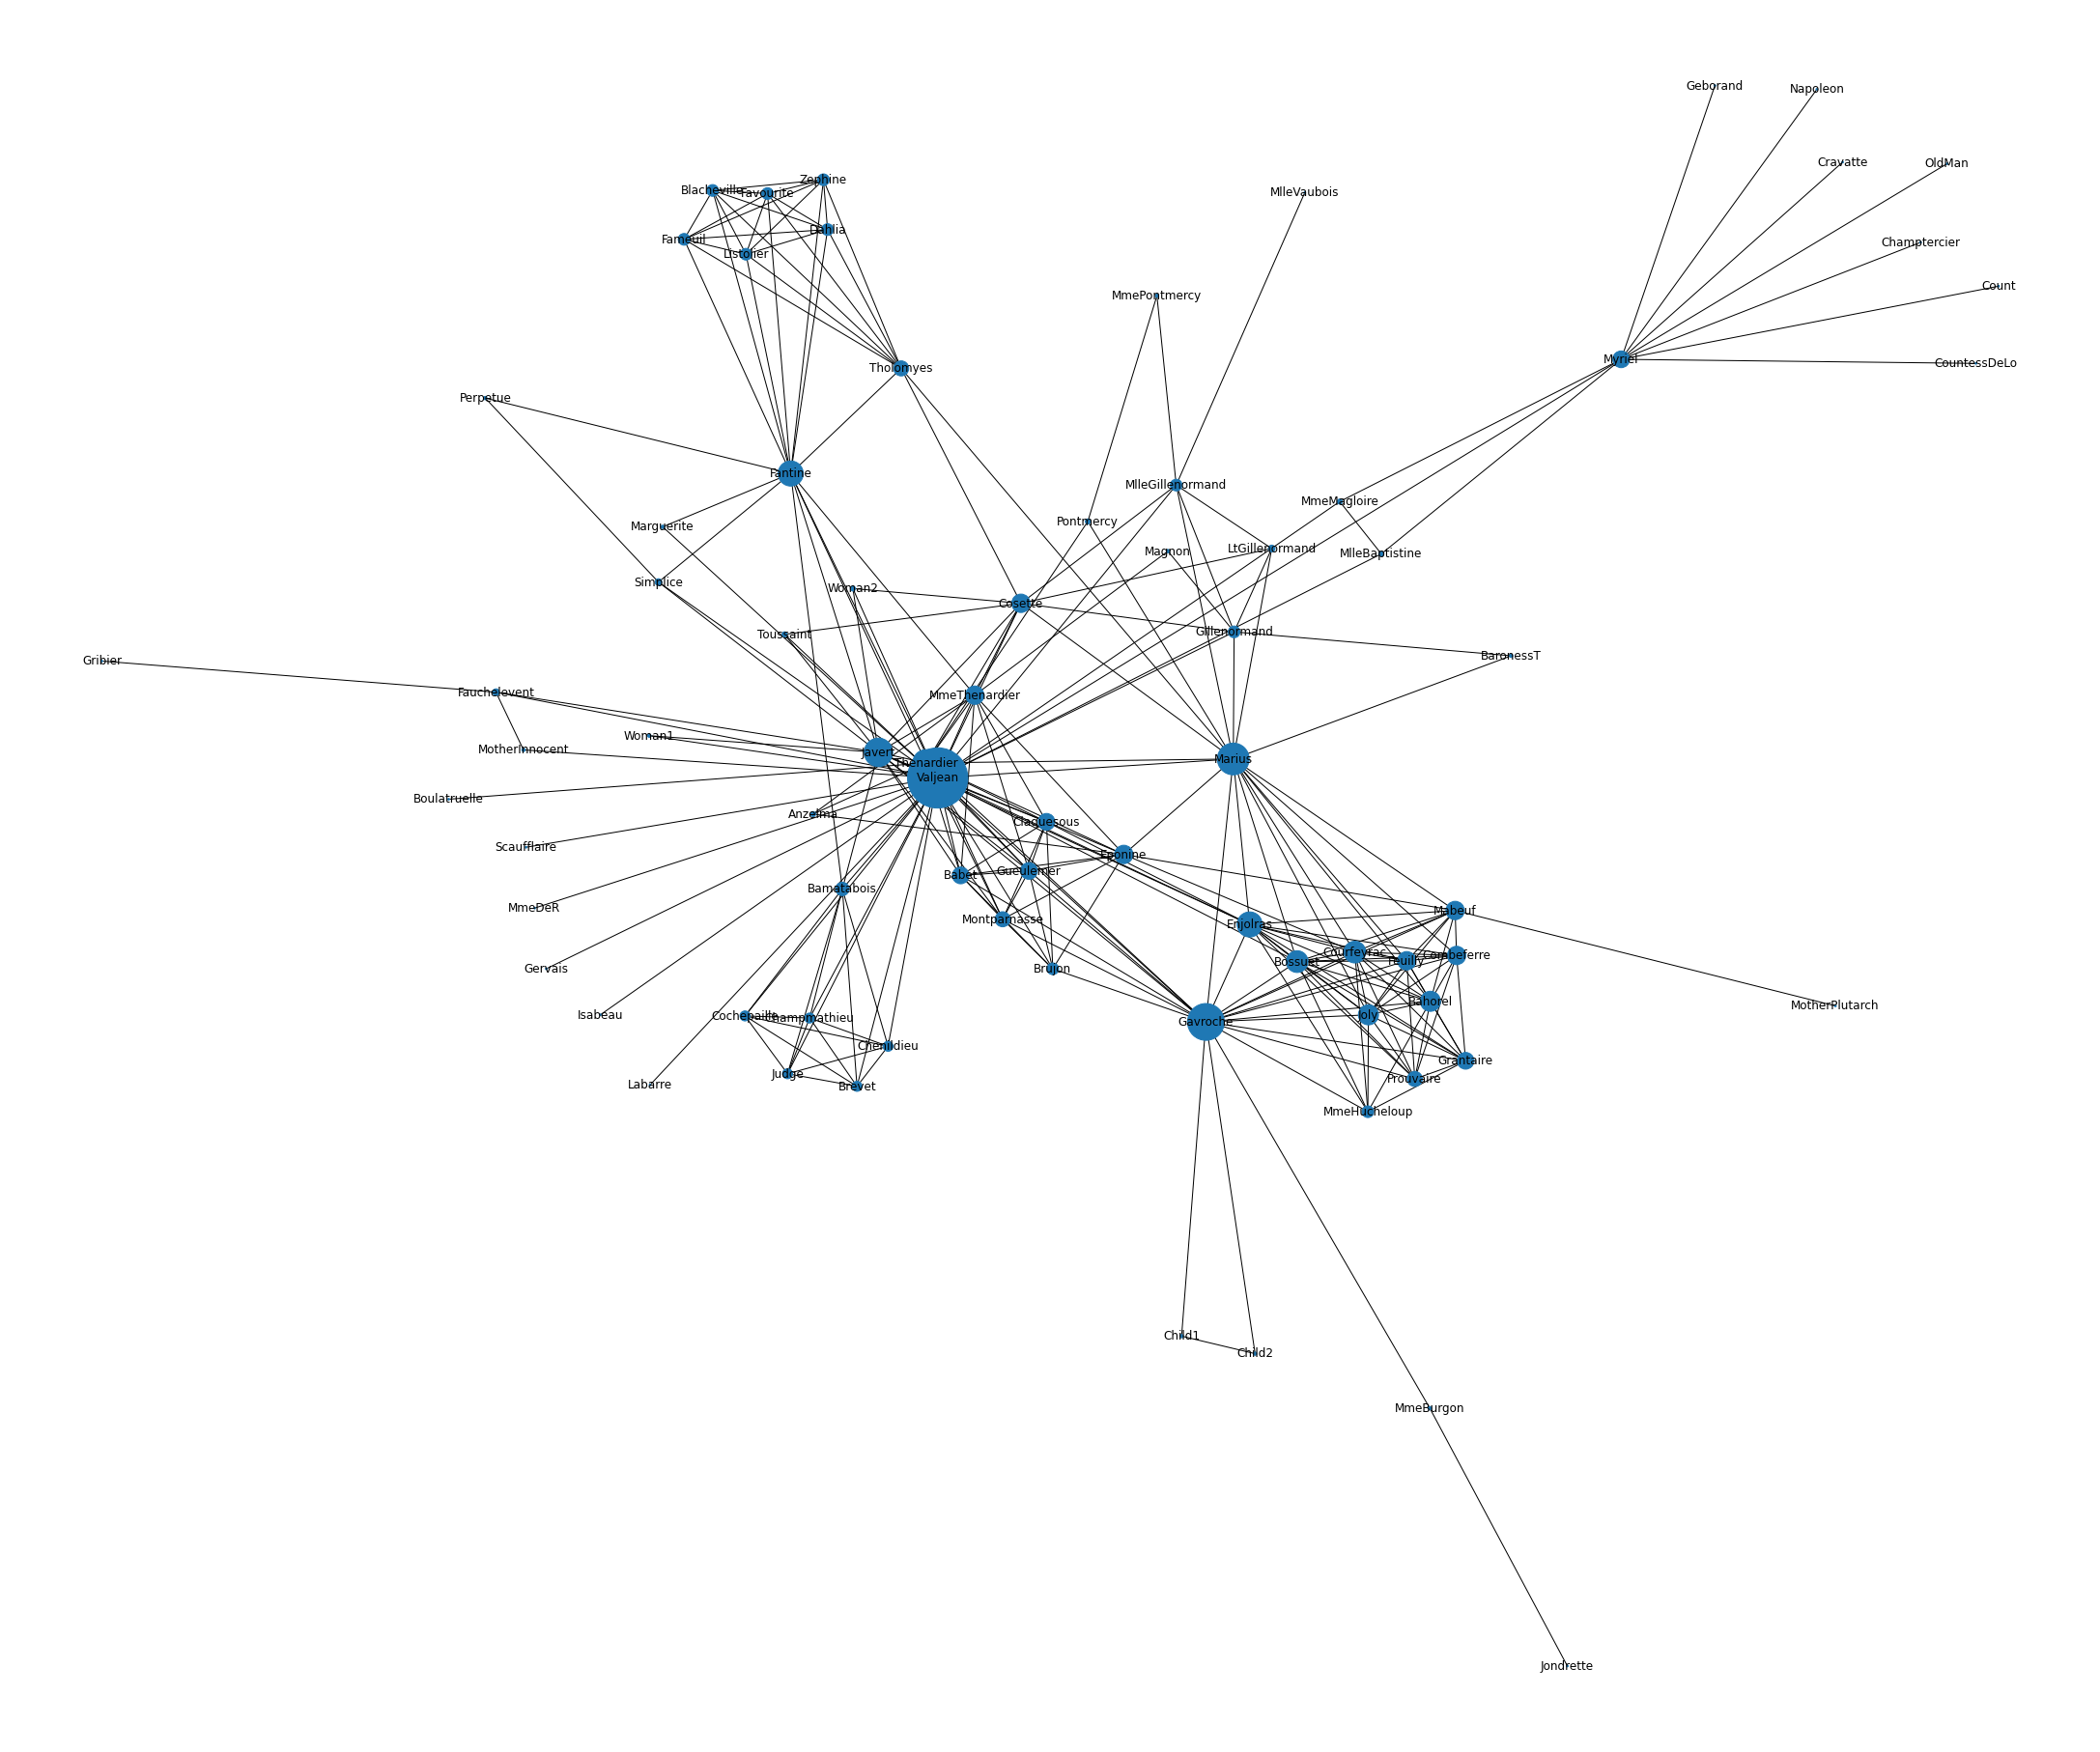

In [3]:
plt.figure(figsize = (30,25))
nx.draw(G,node_size=3*np.array(list(dict(G.degree()).values()))**2,with_labels=True)

### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

c) closeness centrality;

In [4]:
from networkx import degree_centrality
from networkx import betweenness_centrality
from networkx import closeness_centrality


In [57]:
def sort_node(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}: {1}: {2}'.format(i+1,ind[i],d[ind[i]]))
    return ind
#degree centrality;
dc = dict(nx.degree(G))
ind1 = sort_node(dc,5)

1: Valjean: 36
2: Gavroche: 22
3: Marius: 19
4: Javert: 17
5: Thenardier: 16


In [78]:
#betweenness centrality
bc = betweenness_centrality(G)
result = sort_node(bc,5)

1: Valjean: 0.5699890527836184
2: Myriel: 0.17684210526315788
3: Gavroche: 0.16511250242584766
4: Marius: 0.132032488621946
5: Fantine: 0.12964454098819422


In [79]:
#closeness centrality
cc = closeness_centrality(G)
result = sort_node(cc,5)

1: Valjean: 0.6440677966101694
2: Marius: 0.5314685314685315
3: Thenardier: 0.5170068027210885
4: Javert: 0.5170068027210885
5: Gavroche: 0.5135135135135135


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [7]:
𝛼_list =[0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
for 𝛼 in 𝛼_list:
    pr = nx.pagerank(G, alpha=𝛼)
    Top5pr=sorted(pr.values(),reverse=True)[4]
    TopNodesPr=[d for d in G if pr[d]>=Top5pr]
    print(TopNodesPr)



['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Javert', 'Gavroche', 'Marius']
['Myriel', 'Valjean', 'Thenardier', 'Javert', 'Gavroche']
['Myriel', 'Valjean', 'Thenardier', 'Javert', 'Gavroche']
['Myriel', 'Valjean', 'Thenardier', 'Javert', 'Gavroche']


### Q4. Partition the network using any available algorithm of your choice (e.g. Combo), report network partition modularity score and visualize the partition (different communities with different colors)

In [8]:
PCKarate, PCKarate_mod = pycombo.execute(G, max_communities = 0) #combo partition
PCKarate_mod

0.560008370016743

In [9]:
def modularity(G, partition, correctLoops = False): #modularity of the networkx graph given partition dictionary; correctLoop - special flag to account for inconsistency in loop edge definition in some graphs
    A = np.array(nx.adjacency_matrix(G).todense(), dtype = float)
    if correctLoops and not isinstance(G,nx.DiGraph):
        A += np.diag(np.diag(A))
    wout = A.sum(axis=1)
    win = A.sum(axis=0)
    T = wout.sum()
    Q = A / T - np.matmul(wout.reshape(-1, 1), win.reshape(1, -1)) / (T ** 2)
    C = np.array([partition[n] for n in G.nodes()]) #could there be an indexing mismatch between Q and C
    return (Q * (C.reshape(-1,1) == C.reshape(1,-1))).sum()

In [10]:
print('Karate Club partitioning Modularity={0}'.format(modularity(G,PCKarate)))

Karate Club partitioning Modularity=0.56000837001674


In [11]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')

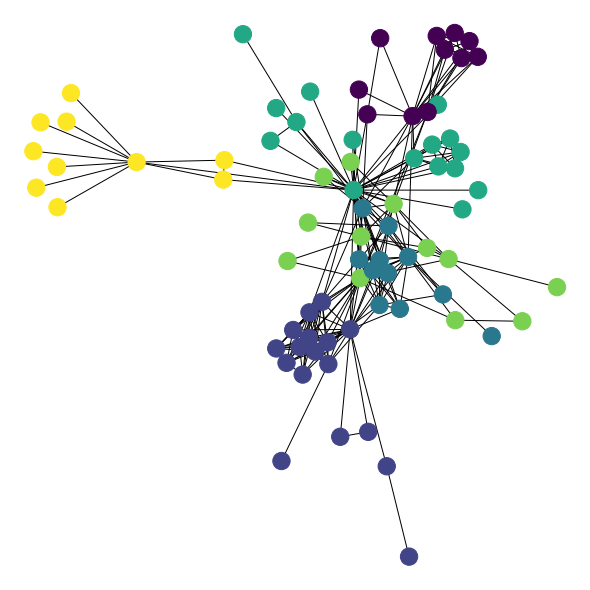

In [12]:
random.seed(2015)
visualizePartition(G,PCKarate,None)

## Task 2 (World airports). 
### Q1. 
Find connected components, report their number and the sizes.  

### Q2. 
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

### Q3. 
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### Q4. 
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$)

### Q5.
Partition the network using Combo algorithm, visualize the partition 


In [13]:
cities = pd.read_csv('citiesTable.csv', index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [14]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [15]:
#now read the links
links = pd.read_csv('citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [16]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [17]:
#add edges to the network
Flights.add_edges_from(edgelist)

In [61]:
#q1 Find connected components, report their number and the sizes.
print('Number of connected components: {0}'.format(nx.number_connected_components(Flights)))
connected_components = sorted(nx.connected_components(Flights), key=len, reverse=True)
for i in range(nx.number_connected_components(Flights)):
    print('The size of component{0} is {1}'.format(i,len(connected_components[i])))

Number of connected components: 4
The size of component0 is 2981
The size of component1 is 3
The size of component2 is 2
The size of component3 is 2


In [74]:
#q2
Flights_connected = nx.DiGraph()
Flights_connected.add_nodes_from(set(connected_components[0]))
links_1 = links[links['departure city'].isin(set(connected_components[0]))]
links_1 = links_1[links_1['arrival city'].isin(set(connected_components[0]))]
edgelist_1 = [(links_1['departure city'][j],links_1['arrival city'][j]) for j in list(links_1.index)]
Flights_connected.add_edges_from(edgelist_1)

In [83]:
#degree
q2_degree = dict(nx.degree(Flights_connected))
result = sort_node(mc_1,10)

1: London: 621
2: Paris: 528
3: Moscow: 456
4: Frankfurt: 454
5: Atlanta: 416
6: Chicago: 396
7: Amsterdam: 391
8: Beijing: 368
9: Istanbul: 360
10: Dallas-fort Worth: 360


In [85]:
#betweenneass
q2_betweenneass = nx.betweenness_centrality(Flights_connected)
result = sort_node(q2_betweenneass,10)

1: London: 0.09293077310458144
2: Paris: 0.07901712598301569
3: Anchorage: 0.07816141447539024
4: Moscow: 0.06073612222004975
5: Chicago: 0.05670374201525252
6: Frankfurt: 0.05355111483155898
7: Seattle: 0.052376902495192786
8: Dubai: 0.04690787134453895
9: Los Angeles: 0.046073945236556134
10: Toronto: 0.04582983719391729


In [87]:
#closeness
q2_closeness = nx.closeness_centrality(Flights_connected)
result = topdict(q2_closeness,10)

1: London: 0.418762886795032
2: Paris: 0.41172584066488155
3: Frankfurt: 0.41126510395690574
4: Amsterdam: 0.40308941982285706
5: New York: 0.3956047131576856
6: Los Angeles: 0.3917567259410952
7: Toronto: 0.3916001902221523
8: Dubai: 0.3884955375512579
9: Chicago: 0.3875226345311611
10: Newark: 0.3855408114592079


In [90]:
#pagerank
q2_pagerank = nx.pagerank(Flights_connected,0.85)
result = topdict(q2_pagerank,10)

1: London: 0.006819157626636694
2: Moscow: 0.0064594008780119614
3: Paris: 0.006401329472831892
4: Atlanta: 0.005135955255080827
5: Chicago: 0.004788543483070131
6: Dallas-fort Worth: 0.004759212799717171
7: Frankfurt: 0.004741999531256298
8: Denver: 0.004690383544945224
9: Houston: 0.004508431648755891
10: Istanbul: 0.004343157260348601


In [94]:
#Q3. Find maximum and average network distance of the shortest path 
# (number of edges, regardless of size) between all 
# pairs of the airports from the largest connected component. 
# Visualize the shortest path of the maximum length.
import networkx as nx
sp = dict(nx.shortest_path_length(Flights_connected))

# spl = dict(nx.all_pairs_shortest_path_length(Flights_connected))


In [95]:
# allpaths=dict(nx.shortest_path_length(Flights0))
diameter=0; i0=0; j0=0
for i in sp.items():
    for j in i[1].items():
        if j[1] > diameter:
            diameter=j[1]
            i0=i[0]
            j0=j[0]  
print('Maximum distance of the shortest path, from {0} to {1} : {2}'.format(i0,j0,diameter))

Maximum distance of the shortest path, from Peawanuck to Stony River : 14


In [97]:
sum=0; count=0
for i in sp.items():
    for j in i[1].items():
        sum += j[1]
        count += 1
print('Average distance of the shortest path: {0}'.format(sum/count))

Average distance of the shortest path: 3.9709507997186333


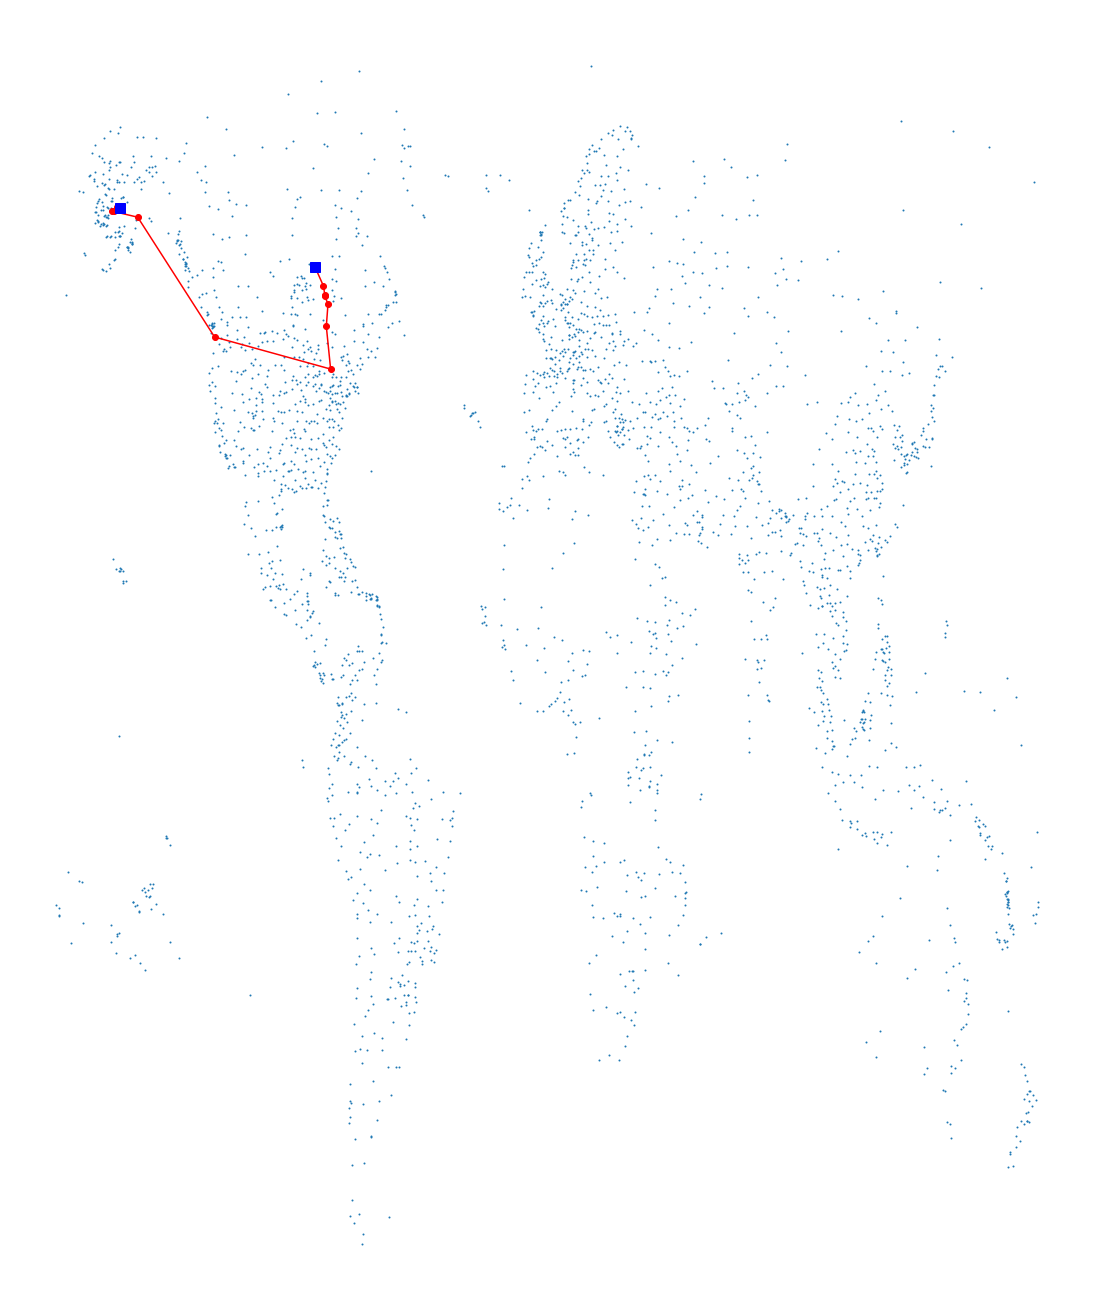

In [98]:
cityPos = {cities.index[c]:(cities['long. most active airport'][c],
           cities['lat. most active airport'][c]) for c in range(len(cities.index))}

def visualize_path(path):
    plt.figure(figsize = (15,18))
    nx.draw(Flights0,pos=cityPos,with_labels=False,arrows=False,node_size=1,width=0,edge_color='green')
    x=[cityPos[v][0] for v in path]
    y=[cityPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

Lpath=nx.shortest_path(Flights_connected,i0,j0)
visualize_path(Lpath)

In [130]:
# pr = nx.pagerank(Flights, alpha=0.85)
# Top100pr=sorted(pr.values(),reverse=True)[99]
# amountTop100 = 0
# TopNodesPr=[d for d in Flights 
#             if pr[d]>=Top100pr:\
#                amountTop100+= Top100pr]
# print(TopNodesPr)


In [136]:
#Q4
connected_top100 = nx.pagerank(Flights_connected,0.85)
Top100pr = sort_node(connected_top100,100)
Flights_top100=nx.DiGraph()
Flights_top100.add_nodes_from(set(Top100pr))
links_top100 = links[links['departure city'].isin(set(Top100pr))]
links_top100 = links_top100[links_top100['arrival city'].isin(set(Top100pr))]
edgelist_top100 = [(links_top100['departure city'][j],links_top100['arrival city'][j]) for j in list(links_top100.index)]
Flights_top100.add_edges_from(edgelist_top100)
paths_top100 = dict(nx.shortest_path_length(Flights_top100))



1: London: 0.006819157626636694
2: Moscow: 0.0064594008780119614
3: Paris: 0.006401329472831892
4: Atlanta: 0.005135955255080827
5: Chicago: 0.004788543483070131
6: Dallas-fort Worth: 0.004759212799717171
7: Frankfurt: 0.004741999531256298
8: Denver: 0.004690383544945224
9: Houston: 0.004508431648755891
10: Istanbul: 0.004343157260348601
11: Beijing: 0.0042583417385510846
12: Amsterdam: 0.0040376823870011515
13: Dubai: 0.003959562977931381
14: Bangkok: 0.003959443027996914
15: New York: 0.003857834709356536
16: Toronto: 0.003803838228924571
17: Los Angeles: 0.0037386995922242174
18: Tokyo: 0.003733034510380846
19: Shanghai: 0.0036714717266401135
20: Minneapolis: 0.003649354480897603
21: Rome: 0.0034541928847559565
22: Seoul: 0.0034079998130735582
23: Kuala Lumpur: 0.0034003207613973593
24: Las Vegas: 0.0033963416870907755
25: Newark: 0.0033580660889329958
26: Madrid: 0.0033195781052975416
27: Munich: 0.003152665135606109
28: Detroit: 0.003132116772473641
29: Bogota: 0.00311520314567755

In [138]:
sum=0; count=0
for i in paths_top100.items():
    for j in i[1].items():
        sum += j[1]
        count += 1
print('top 100 airports average distance: {0}'.format(sum/count))

top 100 airports average distance: 3.9709507997186333


In [100]:
#q5 Partition the network using Combo algorithm, visualize the partition

PCKarate, PCKarate_mod = pycombo.execute(Flights_connected, max_communities = 0) #combo partition
PCKarate_mod

0.6586404898524769

In [104]:
print('Karate Club partitioning Modularity={0}'.format(modularity(Flights_connected,PCKarate)))

Karate Club partitioning Modularity=0.6586404898523752


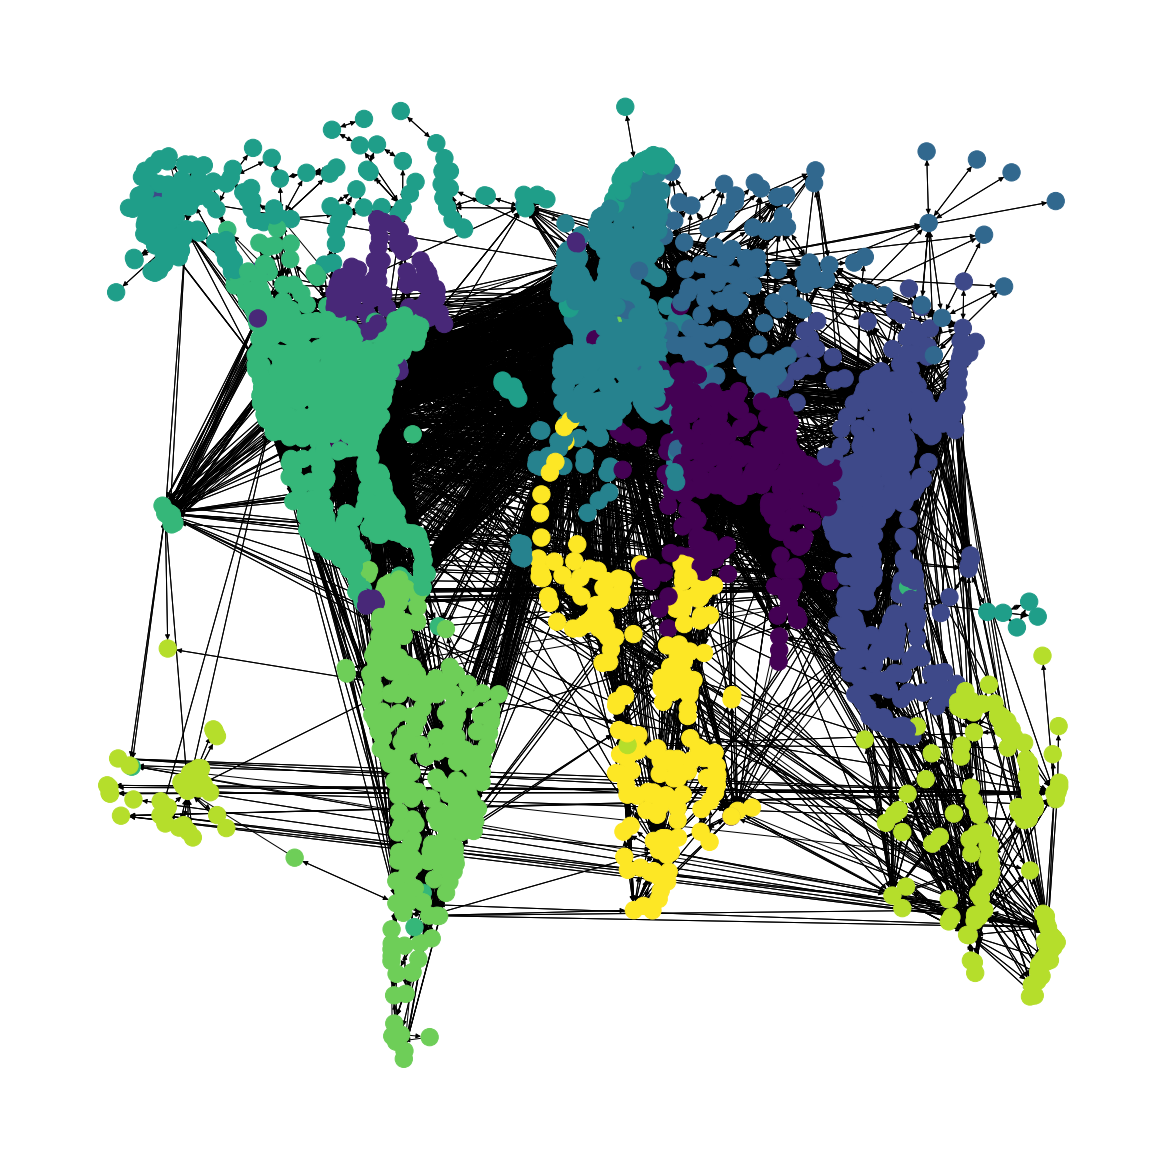

In [105]:
random.seed(2015)
visualizePartition(Flights_connected,PCKarate,cityPos)

# Extracredit task 3. Compare weekend and weekday partitions of the taxi network

download ridership data from:https://drive.google.com/drive/folders/198aY_OAeRWWV4odEyB5_iCUog0p5vYnm?usp=sharing

## Q1. 
Aggregate provided daily taxi ridership into a) all weekend and b) all weekday ridership over the year

## Q2. 
Fit a gravity model $$ridership(o,d)\sim k\cdot pop(o) pop(d) travelime(o,d)^{-q}$$ to both networks, compare exponents (use log-scale linear regression with a slope coefficient $-q$ and intercent $\ln(k)$), replace zero ridership edges with a small number $1e-3$ for logarithm feasibility)

## Q3. 
Partition both networks using Combo algorithm, visualize and compare partitions

In [106]:
#Q1. Aggregate provided daily taxi ridership into 
# a) all weekend and 
# b) all weekday ridership over the year
ridership_df = pd.read_csv("ridership.csv",index_col=None)
pop_df = pd.read_csv("taxi_zone_pop.csv",index_col=None)
tripduratio_df = pd.read_csv('taxiZones_tripduration.csv', index_col=None)

In [119]:
df = pd.merge(ridership_df, tripduratio_df, how='right', left_on=['PULocationID','DOLocationID'], right_on=['PULocationID','DOLocationID'])
df = pd.merge(df, pop_df, how='right', left_on=['PULocationID'], right_on=['location_id'])
df = df.rename(columns={"Population":"PUPopulation"})
df = pd.merge(df, pop_df, how='right', left_on=['DOLocationID'], right_on=['location_id'])
df = df.rename(columns={"Population":"DOPopulation"})


In [120]:
df = df.dropna()
df.head()

,Date,PULocationID,DOLocationID,vehicle_count,duration,location_id_x,PUPopulation,location_id_y,DOPopulation
0,2019-12-02,132.0,2.0,1.0,1554.0,132.0,0.0,2,1785
1,2019-12-28,132.0,2.0,1.0,1554.0,132.0,0.0,2,1785
2,2019-05-29,132.0,2.0,1.0,1554.0,132.0,0.0,2,1785
3,2019-01-11,132.0,2.0,1.0,1554.0,132.0,0.0,2,1785
4,2019-04-23,132.0,2.0,1.0,1554.0,132.0,0.0,2,1785


In [123]:
# df['PUPopulation'].value_counts()
df = df.drop(columns=['location_id_x','location_id_y'])

In [125]:
df['Date'] = pd.to_datetime(df['Date'])
df['DOW'] = df['Date'].dt.dayofweek

In [126]:
df.columns

Index(['Date', 'PULocationID', 'DOLocationID', 'vehicle_count', 'duration',
       'PUPopulation', 'DOPopulation', 'DOW'],
      dtype='object')

In [127]:
weekday = [0,1,2,3,4]
weekend = [5,6]
columns = ['PULocationID', 'DOLocationID',
       'PUPopulation', 'DOPopulation','duration']
weekday_df = df[df['DOW'].isin(set(weekday))]
weekend_df = df[df['DOW'].isin(set(weekend))]
weekday_agg = weekday_df.groupby(columns).agg({'vehicle_count':'sum'}).reset_index()
weekend_agg = weekend_df.groupby(columns).agg({'vehicle_count':'sum'}).reset_index()

In [128]:
weekend_agg.head()

,PULocationID,DOLocationID,PUPopulation,DOPopulation,duration,vehicle_count
0,2.0,30.0,1785.0,26711,20.0,2.0
1,2.0,61.0,1785.0,103462,2340.0,1.0
2,3.0,3.0,28510.0,28510,467.0,8312.0
3,3.0,31.0,28510.0,540,920.5,719.0
4,3.0,32.0,28510.0,34309,426.0,7199.0


In [129]:
#q2
weekday_agg.replace({'vehicle_count': {0: 1e-3}})
weekend_agg.replace({'vehicle_count': {0: 1e-3}})

,PULocationID,DOLocationID,PUPopulation,DOPopulation,duration,vehicle_count
0,2.0,30.0,1785.0,26711,20.000000,2.0
1,2.0,61.0,1785.0,103462,2340.000000,1.0
2,3.0,3.0,28510.0,28510,467.000000,8312.0
3,3.0,31.0,28510.0,540,920.500000,719.0
4,3.0,32.0,28510.0,34309,426.000000,7199.0
...,...,...,...,...,...,...
25096,263.0,259.0,76768.0,43583,1366.350000,565.0
25097,263.0,260.0,76768.0,43846,1198.422535,1735.0
25098,263.0,261.0,76768.0,20088,1742.500000,1556.0
25099,263.0,262.0,76768.0,76768,303.902453,28572.0
